In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("showwcase_sessions.csv")

In [3]:
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [4]:
df["login_date"] = pd.to_datetime(df['login_date'])
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


## Drop all Null Values

In [5]:
df.dropna(inplace=True)

## Dataframe pertaining to login counts

In [6]:
df_date = df.groupby("login_date")["session_id"].count().to_frame().reset_index()
df_date.columns = ["login_date", "login_count"]
df_date

,login_date,login_count
0,2019-10-01,9
1,2019-10-02,5
2,2019-10-03,10
3,2019-10-04,9
4,2019-10-05,14
5,2019-10-06,12
6,2019-10-07,13
7,2019-10-08,8
8,2019-10-09,10
9,2019-10-10,14


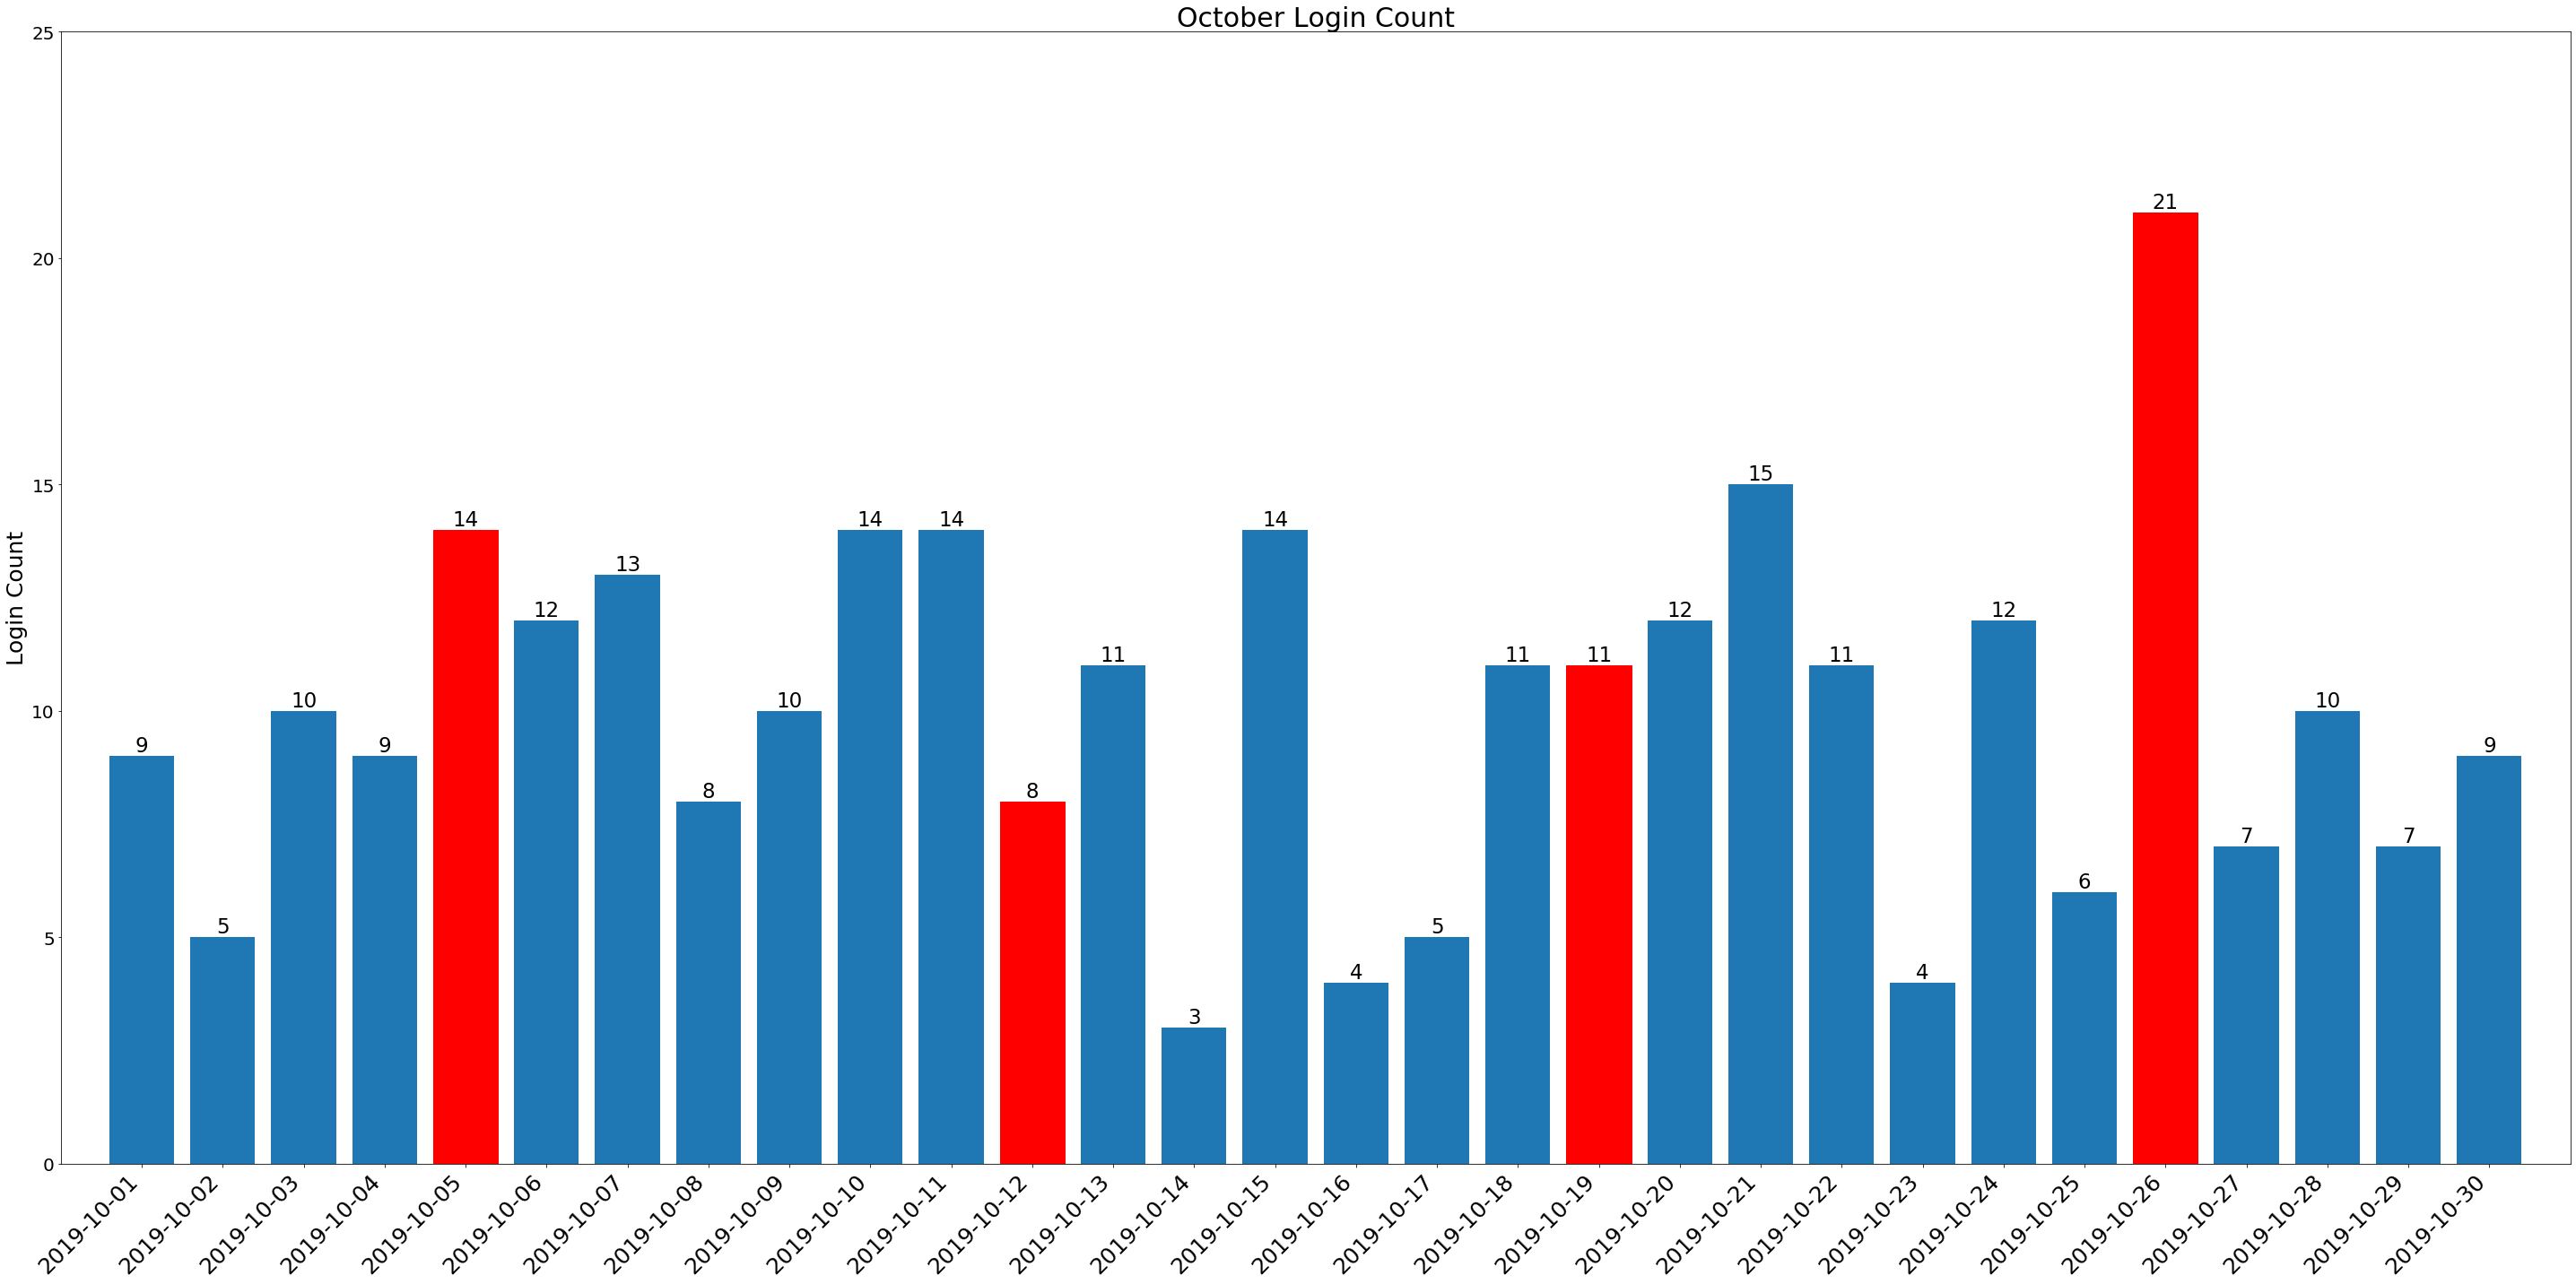

In [7]:
# Create figure size
fig, ax = plt.subplots(figsize = (40,20))

x_axis = np.arange(df_date["login_count"].size)

y_axis = df_date["login_count"]

bar_list = ax.bar(x_axis, y_axis)

plt.xticks(x_axis, df_date["login_date"].astype(str), Fontsize = 25, rotation = 45, ha = "right")
plt.yticks(Fontsize = 20)

plt.xlim(min(x_axis) - 1, max(x_axis) + 1)
plt.ylim(0, 25)

plt.ylabel("Login Count", Fontsize = 25)
plt.title("October Login Count", Fontsize = 30)

# Highlight Saturdays
saturdays = [4, 11, 18, 25]
for i in saturdays:
    bar_list[i].set_color('r')

# Dimension of each bar box
rects = ax.patches

# Loops through each box to grab dimensions
for rect in rects:
    
    # Width of Box
    box_width = rect.get_width()
    
    # Height of Box
    height = rect.get_height()
    
    # Center of Box
    center = rect.get_x() + box_width / 2
    
    # Text is above boxes if height greater than 0
    if height > 0:
        ax.text(center, height, height, Fontsize = 23, ha = 'center', va = 'bottom')
        
    # Text is below boxes if height is less than 0
    else:
         ax.text(center, height, height, Fontsize = 23, ha = 'center', va = 'top')

# Better fit for graph to prevent axis cutoffs
plt.tight_layout()

In [8]:
df_date2 = df.groupby("login_date")["session_projects_added"].sum().to_frame().reset_index()

In [9]:
df_date2.columns = ["login_date", "#_of_session_projects_added"]
df_date2

,login_date,#_of_session_projects_added
0,2019-10-01,16.0
1,2019-10-02,12.0
2,2019-10-03,19.0
3,2019-10-04,8.0
4,2019-10-05,22.0
5,2019-10-06,20.0
6,2019-10-07,18.0
7,2019-10-08,12.0
8,2019-10-09,22.0
9,2019-10-10,20.0


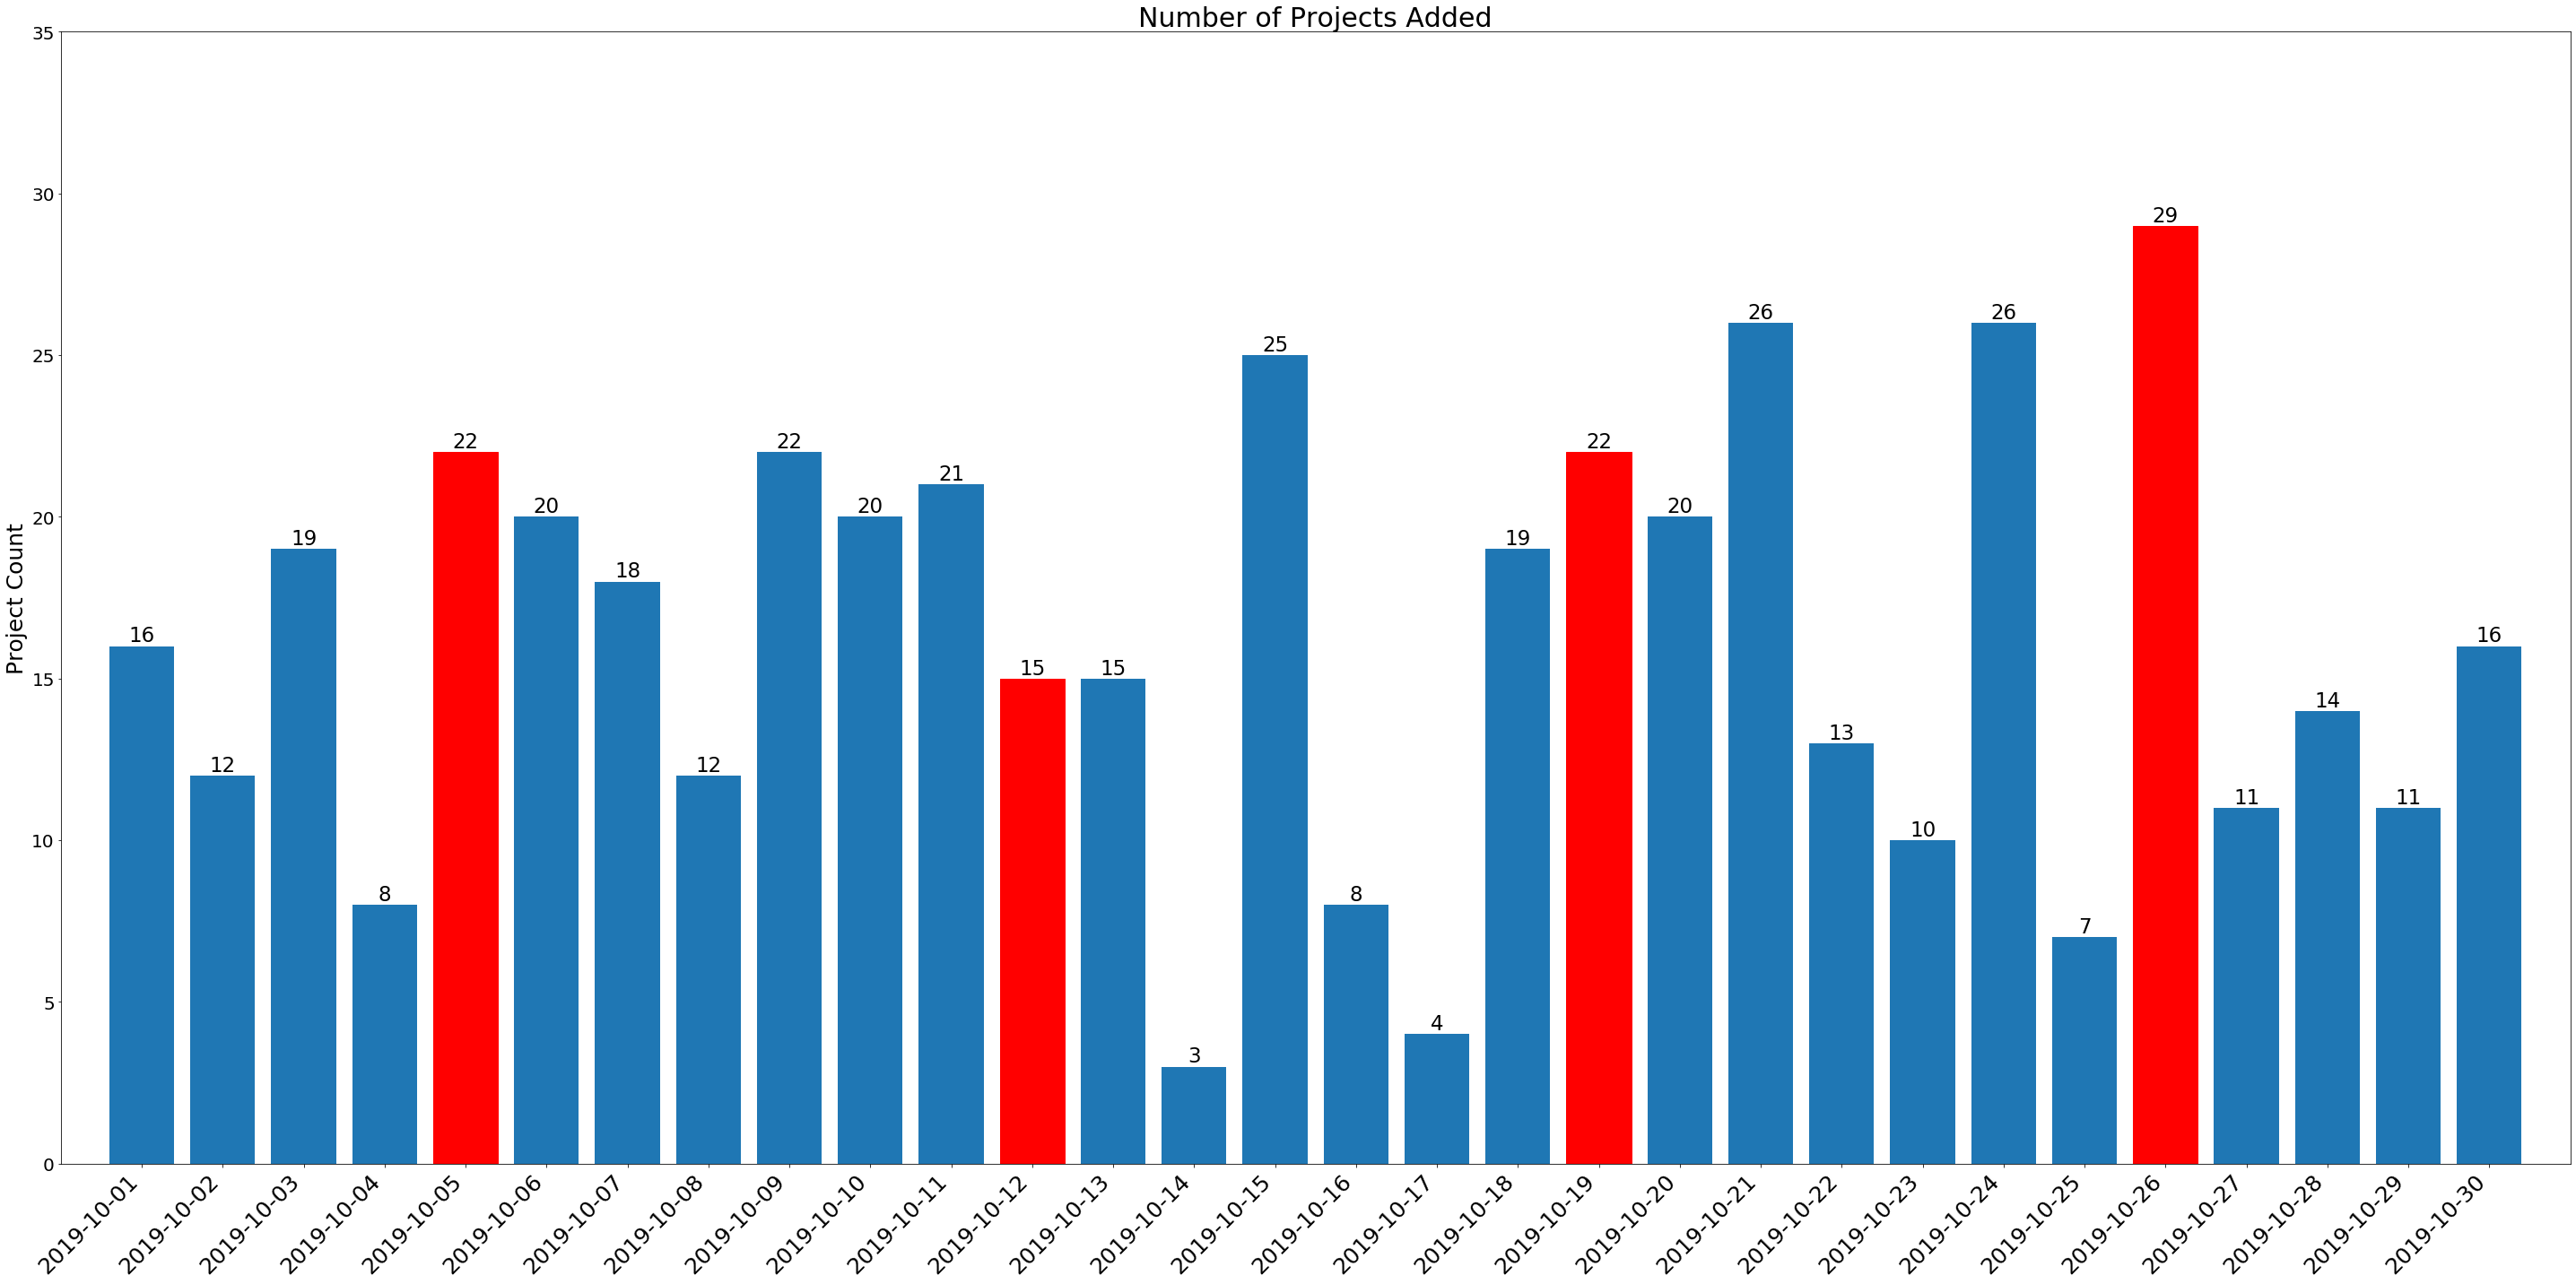

In [10]:
# Create figure size
fig, ax = plt.subplots(figsize = (40,20))

x_axis = np.arange(df_date["login_date"].size)

y_axis = df_date2["#_of_session_projects_added"].astype(int)

bar_list = ax.bar(x_axis, y_axis)

plt.xticks(x_axis, df_date["login_date"].astype(str), Fontsize = 25, rotation = 45, ha = "right")
plt.yticks(Fontsize = 20)

plt.xlim(min(x_axis) - 1, max(x_axis) + 1)
plt.ylim(0, 35)

plt.ylabel("Project Count", Fontsize = 25)
plt.title("Number of Projects Added", Fontsize = 30)

# Highlight Saturdays
saturdays = [4, 11, 18, 25]
for i in saturdays:
    bar_list[i].set_color('r')

# Dimension of each bar box
rects = ax.patches

# Loops through each box to grab dimensions
for rect in rects:
    
    # Width of Box
    box_width = rect.get_width()
    
    # Height of Box
    height = rect.get_height()
    
    # Center of Box
    center = rect.get_x() + box_width / 2
    
    # Text is above boxes if height greater than 0
    if height > 0:
        ax.text(center, height, height, Fontsize = 23, ha = 'center', va = 'bottom')
        
    # Text is below boxes if height is less than 0
    else:
         ax.text(center, height, height, Fontsize = 23, ha = 'center', va = 'top')

# Better fit for graph to prevent axis cutoffs
plt.tight_layout()

In [11]:
import dateutil.relativedelta as relativedelta 
import dateutil.rrule as rrule
import datetime 
year = 2019
before = datetime.datetime(year,10,1)
after = datetime.datetime(year,10,30)

SU = rrule.rrule(rrule.WEEKLY,byweekday=relativedelta.SU,dtstart=before).between(before,after,inc=True)
MO = rrule.rrule(rrule.WEEKLY,byweekday=relativedelta.MO,dtstart=before).between(before,after,inc=True)
TU = rrule.rrule(rrule.WEEKLY,byweekday=relativedelta.TU,dtstart=before).between(before,after,inc=True)
WE = rrule.rrule(rrule.WEEKLY,byweekday=relativedelta.WE,dtstart=before).between(before,after,inc=True)
TH = rrule.rrule(rrule.WEEKLY,byweekday=relativedelta.TH,dtstart=before).between(before,after,inc=True)
FR = rrule.rrule(rrule.WEEKLY,byweekday=relativedelta.FR,dtstart=before).between(before,after,inc=True)
SA = rrule.rrule(rrule.WEEKLY,byweekday=relativedelta.SA,dtstart=before).between(before,after,inc=True)

In [12]:
df['login_date'] = df['login_date'].dt.day_name()

In [13]:
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,Wednesday,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,Wednesday,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,Wednesday,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,Wednesday,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,Wednesday,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [14]:
df_datelogin = df.groupby("login_date")["session_id"].count().to_frame().reset_index()
df_datelogin

,login_date,session_id
0,Friday,40
1,Monday,41
2,Saturday,54
3,Sunday,42
4,Thursday,41
5,Tuesday,49
6,Wednesday,32


In [15]:
df_datelogin.columns = ["login_date", "login_count"]

In [16]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_datelogin["login_date"] = pd.Categorical(df_datelogin['login_date'], categories=cats, ordered=True)
df_datelogin = df_datelogin.sort_values('login_date')
df_datelogin

,login_date,login_count
1,Monday,41
5,Tuesday,49
6,Wednesday,32
4,Thursday,41
0,Friday,40
2,Saturday,54
3,Sunday,42


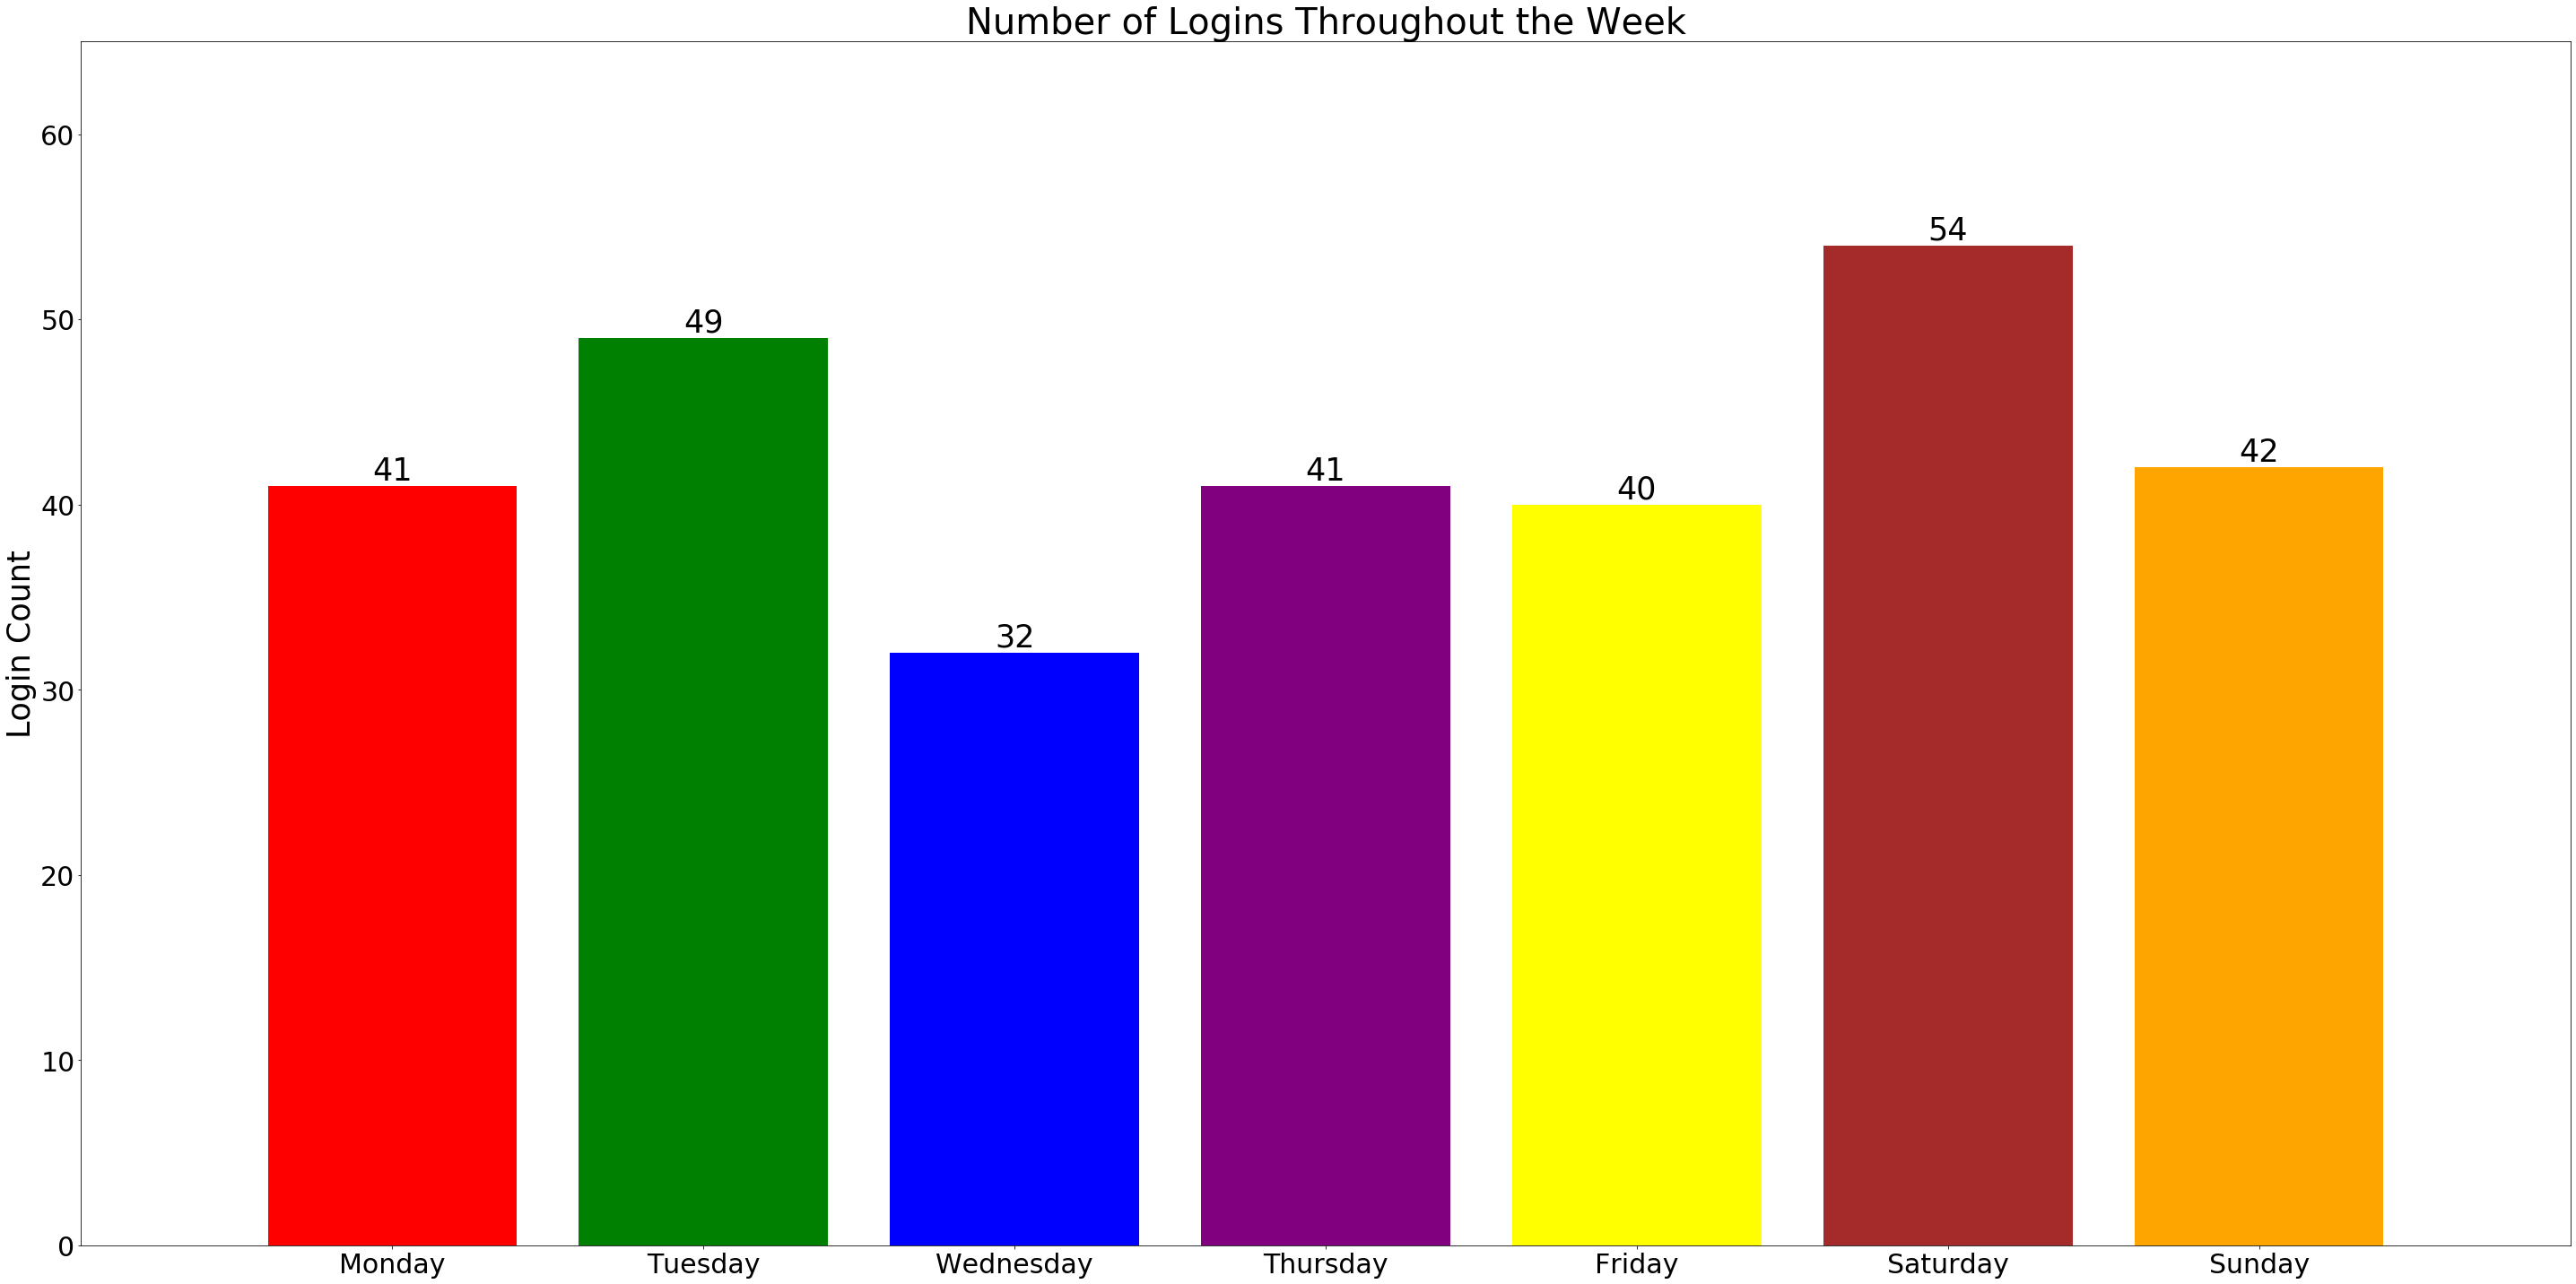

In [33]:
fig, ax = plt.subplots(figsize = (40,20))

x_axis = np.arange(df_datelogin["login_date"].size)

y_axis = df_datelogin["login_count"].astype(int)

bar_list = ax.bar(x_axis, y_axis, color=['r', 'g', 'b', 'purple', 'yellow', 'brown', 'orange'])

plt.xticks(x_axis, df_datelogin["login_date"].astype(str), Fontsize = 30)
plt.yticks(Fontsize = 30)

plt.xlim(min(x_axis) - 1, max(x_axis) + 1)
plt.ylim(0, 65)

plt.ylabel("Login Count", Fontsize = 35)
plt.title("Number of Logins Throughout the Week", Fontsize = 40)

# Dimension of each bar box
rects = ax.patches

# Loops through each box to grab dimensions
for rect in rects:
    
    # Width of Box
    box_width = rect.get_width()
    
    # Height of Box
    height = rect.get_height()
    
    # Center of Box
    center = rect.get_x() + box_width / 2
    
    # Text is above boxes if height greater than 0
    if height > 0:
        ax.text(center, height, height, Fontsize = 35, ha = 'center', va = 'bottom')
        
    # Text is below boxes if height is less than 0
    else:
         ax.text(center, height, height, Fontsize = 35, ha = 'center', va = 'top')

# Better fit for graph to prevent axis cutoffs
plt.tight_layout()

In [ ]:
day_name